<a href="https://colab.research.google.com/github/yoojungsun0/uci-psych203/blob/main/PSYCH203B_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Go visualize the data. How does resp change as a function of target for sessionID 361?



In [1]:
import pandas as pd
from urllib.request import Request, urlopen
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/PerceptionCognitionLab/data2/master/out/morph1.dat"
url_request  = Request(url)
data = urlopen(url_request )
df = pd.read_table(data, header=0, sep=' ')
df.head(5)

,datID,sessionID,block,trial,background,target,forePeriod,resp,rt
0,1,360,0,0,0,1,32,0,1.262
1,2,360,0,1,0,8,31,0,0.934
2,3,360,0,2,0,9,35,1,0.604
3,4,360,0,3,0,0,31,0,0.617
4,5,360,0,4,0,7,31,0,0.486


Text(0, 0.5, 'Resp')

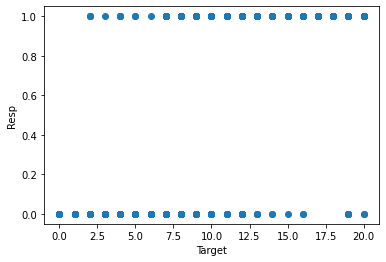

In [2]:
s361 = df.loc[df['sessionID'] == 361]

x = np.asarray(s361['target'])
y = np.asarray(s361['resp'])
X = x.reshape(-1,1)

plt.scatter(x, y, marker='o')
plt.xlabel('Target')
plt.ylabel('Resp')


# 2. Fit a logistic regression model to it. What are the best parameter estimates?



In [3]:
from scipy.optimize import curve_fit # This imports the curve fitting (parameter optimizing) function from scipy

def make_p(q):
  return 1 / (1+np.exp(-q))

def nll(par, x, dat):
  q = par[0] + par[1]*x
  p = make_p(q)
  llvec = dat*np.log(p) + (1-dat)*np.log(1-p)
  return -np.sum(llvec)



In [4]:
popt, _ = curve_fit(nll, X,y) 
# In the optimization function, three arguments should be provided: 
#(1) function (2) the x data we're trying to optimize parameters on , and (3) the y data (labels) we're trying to fit the parameters on
# Returns: the best parameters

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [5]:
popt

array([-2.5454863 ,  1.01098412])

The best parameters are: alpha = -2.55, beta = 1.01.  


# 3. How does this regression model account for the data? Visualize it. You should be able to draw the logistic curve at the MLE on top of the data. Then you can inspect the results to look for misfits.

Now, I will define a new function (new_func) which take in alpha and beta as given arguments. I will pass the best parameters to the function.

In [6]:
def new_func(x, alpha, beta):
  q = alpha + beta*x
  p = make_p(q)
  return p

I will plot the logistic regression curve on the data using the best parameters.

Text(0, 0.5, 'Resp')

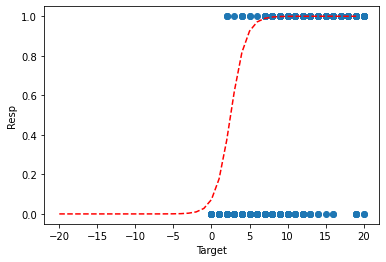

In [7]:
plt.scatter(X,y, marker='o')
# x = s361['target']
x=np.arange(-20,20)
plt.plot(x,new_func(x,*popt), 'r--')
plt.xlabel('Target')
plt.ylabel('Resp')

Inspecting the results: 
First, although the parameters may be optimal in terms of minimizing the negative log likelihood, we can see that the actual regression model is not effective in describing the data. Ideally, the lower part of the regression curve should describe the 0s and the higher part of the curve should correspond to 1. This means that if a new dataset of targets is given, we would not be able to predict which answer it is assciated with based on this model: regardless of whether the participants actually responded with 0 or 1 (A or H), the model will always predict that the participants responded with H (1). Below, I tried several approaches that might improve the model fit on the data.  

**Approach 1: Zero-centering the data**

First, I assumed one of the reasons that the previous model wasn't so good at describing the data was because the logistic regression is centered around zero (has probability of 0.5 when x is 0), but the data is ranged from 1 to 20. So I simply thought that shifting the data range so that it is centered around zero (has mean of zero) might solve this issue.

In [12]:
np.mean(X)
x2 = x - np.mean(x)
X2 = X - np.mean(X)
popt2, _ = curve_fit(nll, X2,y)
print(popt2)

[0.1147568  0.16586329]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Text(0, 0.5, 'Resp')

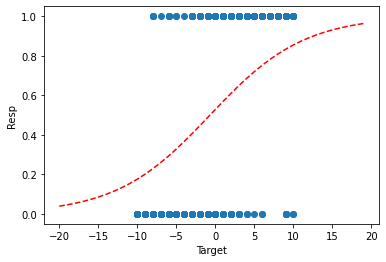

In [21]:
plt.scatter(X2,y, marker='o')
# x = s361['target']
x2=np.arange(-20,20)
plt.plot(x2,new_func(x2,*popt2), 'r--')
plt.xlabel('Target')
plt.ylabel('Resp')

However, as seen in the figure, this method didn't improve the model's fit to the data.

**Approach 2: Normalizing the data to have mean of 0 and standard deviation of 1**

After plotting the results of approach 1, it kind of made sense that it didn't improve the model's performance because the distance between Targets remained same (it would be easier for the model if As and Hs were more apart from each other in terms of x axis). So I configured that normalizing the x data might work, since it will also account for the relative distribution within the data. For normalization, I first subtracted the mean of x data and then divided it with the standard deviation.

In [14]:
x3 = (x - np.mean(x))/np.std(x) # Normalization 
X3 = (X - np.mean(X))/np.std(X)
popt3, _ = curve_fit(nll, X3,y)
print(popt3)

[-0.52208855  1.15372104]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


However, we can observe in the below figure that even after normalization, the two different classes remained clustered within the same range.

Text(0, 0.5, 'Resp')

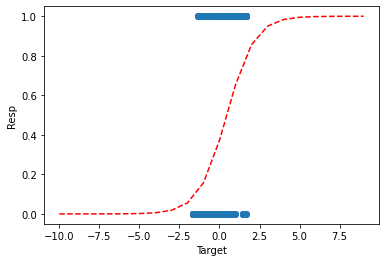

In [25]:
plt.scatter(X3,y, marker='o')
# x = s361['target']
x3=np.arange(-10,10)
plt.plot(x3,new_func(x3,*popt3), 'r--')
plt.xlabel('Target')
plt.ylabel('Resp')

Conclusion: the best parameters acquired by optimization don't necessarily provide the model that describes the data well. In order to see if the optimized model fits the data well, you should check it by plotting it on the data. If the model doesn't seem to fit to the data, then further processes on the data might be needed.